In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier

SEED = 472889135

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
n = 100
d = 2

rng = np.random.default_rng(SEED)
X_all = rng.random(size=(n, d))

# segment having $(0, q)$ and $(1, m+q)$ as extremes
q = 0.2
m = 0.7

# ensure that the segment is contained in $(0, 1)^2$
assert 0 < q < 1
assert 0 < m+q < 1

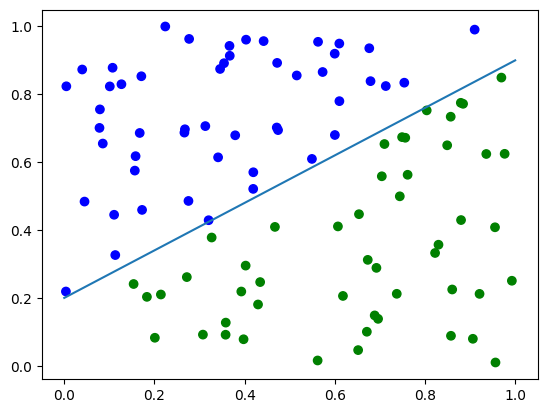

In [3]:
def label(x):
    return 1 if x.dot(np.array([m, -1])) + q >= 0 else 0


y_all = [label(x) for x in X_all]
color = ['blue', 'green']

plt.scatter(*X_all.T, c=[color[y] for y in y_all])
plt.plot([0, 1], [q, m+q])
plt.show()

In [29]:
fig = go.Figure()
fig['layout'].update(width=500, height=500, autosize=False)
fig.add_trace(go.Scatter(x=X_all.T[0],
                         y=X_all.T[1], mode='markers',
                         marker_color=[color[y] for y in y_all]))
fig.add_trace(go.layout.shape.Line(x=[0, 0], y=[1, 1]))


ValueError: Invalid property specified for object of type plotly.graph_objs.layout.shape.Line: 'x'

Did you mean "dash"?

    Valid properties:
        color
            Sets the line color.
        dash
            Sets the dash style of lines. Set to a dash type string
            ("solid", "dot", "dash", "longdash", "dashdot", or
            "longdashdot") or a dash length list in px (eg
            "5px,10px,2px,2px").
        width
            Sets the line width (in px).
        
Did you mean "dash"?

Bad property path:
x
^

In [35]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_all, y_all)

y_hat = model.predict(X_all)


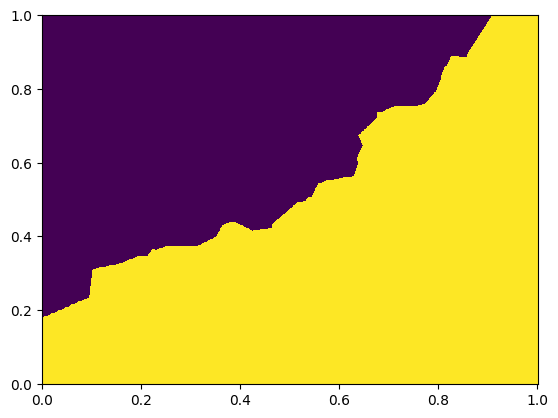

In [45]:
x_grid = np.linspace(0, 1, 500)
y_grid = np.linspace(0, 1, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z)
plt.show()

In [41]:
x_decision

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747